In [412]:
#numpy
import numpy as np

#chargement des posts dans une liste
import os
os.chdir("C:/Users/kenan/Desktop/textmining")

#import pandas
import pandas as pd
disney = pd.read_csv("disney_comment.txt",sep=",",header=0)


In [414]:
mois = {'janvier': '01','février': '02','mars':'03','avril':'04','mai':'05','juin':'06','juillet':'07','août':'08','septembre':'09','octobre':'10','novembre':'11','décembre':'12'}
visite = list()
for x in disney['Review Visite']:
    if x == 'no visite mentionned':
        a = None
    else :
        a = x[10:]
        if a[-1].isdigit()==False:
            a = a + ' 2023'
        a = mois[a[:-5]]+'/'+a[-4:]
    visite.append(a)

disney['Date visite']= visite

In [415]:
#type
print(type(disney))

<class 'pandas.core.frame.DataFrame'>


In [308]:
#énumération des colonnes
print(disney.columns)

Index(['Review_ID', 'Review_Rate', 'Review_Time', 'Review_Text',
       'Review_Visite', 'Date_visite'],
      dtype='object')


In [309]:
#type des colonnes
print(disney.dtypes)

Review_ID        object
Review_Rate       int64
Review_Time      object
Review_Text      object
Review_Visite    object
Date_visite      object
dtype: object


In [310]:
#description
print(disney.describe())

       Review_Rate
count  1467.000000
mean      4.311520
std       1.194758
min       1.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000


In [311]:
#dimension
print(disney.shape)

(1467, 6)


In [312]:
#afficher le contenu de la colonne review rate
print(disney['Review Text'])

0                                              no comment
1       Un incontournable, clap de fin d’un séjour mag...
2                                              no comment
3       (Traduit par Google) L'anticipation était prob...
4                                              no comment
                              ...                        
1462                                           no comment
1463                                           no comment
1464                                           no comment
1465    (Traduit par Google) Le mot "meh" me vient à l...
1466                                           no comment
Name: Review_Text, Length: 1467, dtype: object


In [313]:
#fréquence du nombre de notes
print(disney.Review_Rate.value_counts())

5    974
4    242
1    106
3     91
2     54
Name: Review_Rate, dtype: int64


In [418]:
#fonction pour ne garder que le commentaire traduit
def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index(last)
        return s[start:end]
    except ValueError:
        return ""

In [315]:
#création d'une nouvelle colonne avce uniquement le commentaire traduit
disney['Text'] = disney['Review Text'].apply(lambda x: find_between(x, "(Traduit par Google)" ,"(Avis d'origine)"))

In [316]:
#importer la classe CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
parseur = CountVectorizer()

#pour la colonne "Text"
X = parseur.fit_transform(disney['Text'])

#liste des tokens
print(parseur.get_feature_names_out())



['02' '10' '100' ... 'êtes' 'être' 'œil']


In [317]:
#nombre de tokens
print(len(parseur.get_feature_names_out()))

2879


In [318]:
#construire la matrice
mdt = X.toarray()
print(type(mdt))
print(mdt.shape)

<class 'numpy.ndarray'>
(1467, 2879)


In [319]:
#apparition des mots
freq_mots = np.sum(mdt,axis=0)
print(freq_mots)

[ 1 13  6 ... 20 53  2]


In [320]:
#argsort
index = np.argsort(freq_mots)
print(index)

[   0 1647 1646 ... 1491 1017  730]


In [321]:
#astuce pour imprimer en deux colonnes
imp = {'terme':np.asarray(parseur.get_feature_names())[index],'freq':freq_mots[index]}
print(pandas.DataFrame(imp))


          terme  freq
0            02     1
1     minimales     1
2       minimal     1
3          mini     1
4      minables     1
...         ...   ...
2874         la   382
2875         le   425
2876        les   453
2877         et   600
2878         de   727

[2879 rows x 2 columns]


c:\Users\kenan\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [322]:
#importer la librairie NLTK
import nltk
#installer "Stopwords corpus" à partir de l'onglet "CORPORA"
#nltk.download()

In [323]:
#charger les stopwords
from nltk.corpus import stopwords
stwf = stopwords.words('french')

In [362]:
stwf = [word for word in stwf if word not in stopwords.words('french')]
stwf.extend([word for word in stwf if (len(word) > 3)])
print(stwf)

['zero', 'deux', 'trois', 'quatre', 'cinq', 'six', 'sept', 'huit', 'neuf', 'dix', 'plus', 'très', 'parc', 'tout', 'disney', 'disneyland', 'sud', 'si', 'fois', 'car', 'vraiment', 'moins', 'paris', 'chien', "c'est", 'a', 'cela', "j'ai", 'peu', 'jour', 'faire', 'être', 'tous', "'", 'donc', "qu'il", "qu'elle", 'zero', 'deux', 'trois', 'quatre', 'cinq', 'six', 'sept', 'huit', 'neuf', 'dix', 'plus', 'très', 'parc', 'tout', 'disney', 'disneyland', 'sud', 'si', 'fois', 'car', 'vraiment', 'moins', 'paris', 'chien', "c'est", 'a', 'cela', "j'ai", 'peu', 'jour', 'faire', 'être', 'tous', "'", 'donc', "qu'il", "qu'elle", 'zero', 'deux', 'trois', 'quatre', 'cinq', 'sept', 'huit', 'neuf', 'plus', 'très', 'parc', 'tout', 'disney', 'disneyland', 'fois', 'vraiment', 'moins', 'paris', 'chien', "c'est", 'cela', "j'ai", 'jour', 'faire', 'être', 'tous', 'donc', "qu'il", "qu'elle", 'zero', 'deux', 'trois', 'quatre', 'cinq', 'sept', 'huit', 'neuf', 'plus', 'très', 'parc', 'tout', 'disney', 'disneyland', 'fois'

In [325]:

#nombre
print(len(stwf))

0


In [326]:

#afficher
print(stwf)

[]


In [327]:

#affichage trié
print(np.sort(stwf))

[]


In [328]:
#on va ajouter le stopword 'les'
stwf.append('les')


#afficher
print(np.sort(stwf))


['les']


In [329]:

#reconstruire la mdt sans les stopwords
parseur_bis = CountVectorizer(stop_words=stwf)
X_bis = parseur_bis.fit_transform(disney['Text'])


#liste des tokens
print(len(parseur_bis.get_feature_names_out()))
print(parseur_bis.get_feature_names_out())


2878
['02' '10' '100' ... 'êtes' 'être' 'œil']


In [330]:

#mdt_bis
mdt_bis = X_bis.toarray()
print(mdt_bis.shape)

(1467, 2878)


In [331]:

#apparition des mots
freq_mots_bis = np.sum(mdt_bis,axis=0)
print(freq_mots_bis)


[ 1 13  6 ... 20 53  2]


In [332]:

#argsort
index_bis = np.argsort(freq_mots_bis)
print(index_bis)


[   0 1646 1645 ... 1489 1017  730]


In [333]:

#astuce pour imprimer en deux colonnes
imp = {'terme':np.asarray(parseur_bis.get_feature_names_out())[index_bis],'freq':freq_mots_bis[index_bis]}
print(pandas.DataFrame(imp))

          terme  freq
0            02     1
1     minimales     1
2       minimal     1
3          mini     1
4      minables     1
...         ...   ...
2873        est   359
2874         la   382
2875         le   425
2876         et   600
2877         de   727

[2878 rows x 2 columns]


In [369]:

#rajouter les chiffres en stop words
stwf.extend([word for word in stwf if (len(word) > 3)])
stwf.extend(['zero','un','deux','trois','quatre','cinq','six','sept','huit','neuf','dix','plus','très','parc','tout','disney','disneyland','sud','si','le','nous','de','et','la','les','vous','pour','que','pas','est','il','je','des',
             'des','une','en','dans','était','ai','ne','été','au','ils','sont','du','avec','mais','ne','qui','ce','qu','fois','avons','même','car','ma','vraiment','ou','par','ont','moins','notre','paris','chien','à',"c'est","a","cela",
             "sur","j'ai","ce","y","peu","au","jour","faire","être","se","tous","'","donc","qu'il","qu'elle","n'est","d'une","c'était","votre","ça","ici","étaient"])
print(stwf)

['zero', 'deux', 'trois', 'quatre', 'cinq', 'six', 'sept', 'huit', 'neuf', 'dix', 'plus', 'très', 'parc', 'tout', 'disney', 'disneyland', 'sud', 'si', 'fois', 'car', 'vraiment', 'moins', 'paris', 'chien', "c'est", 'a', 'cela', "j'ai", 'peu', 'jour', 'faire', 'être', 'tous', "'", 'donc', "qu'il", "qu'elle", 'zero', 'deux', 'trois', 'quatre', 'cinq', 'six', 'sept', 'huit', 'neuf', 'dix', 'plus', 'très', 'parc', 'tout', 'disney', 'disneyland', 'sud', 'si', 'fois', 'car', 'vraiment', 'moins', 'paris', 'chien', "c'est", 'a', 'cela', "j'ai", 'peu', 'jour', 'faire', 'être', 'tous', "'", 'donc', "qu'il", "qu'elle", 'zero', 'deux', 'trois', 'quatre', 'cinq', 'sept', 'huit', 'neuf', 'plus', 'très', 'parc', 'tout', 'disney', 'disneyland', 'fois', 'vraiment', 'moins', 'paris', 'chien', "c'est", 'cela', "j'ai", 'jour', 'faire', 'être', 'tous', 'donc', "qu'il", "qu'elle", 'zero', 'deux', 'trois', 'quatre', 'cinq', 'sept', 'huit', 'neuf', 'plus', 'très', 'parc', 'tout', 'disney', 'disneyland', 'fois'

In [335]:

#reconstruire la mdt
parseur_ter = CountVectorizer(stop_words=stwf)
X_ter = parseur_ter.fit_transform(disney['Text'])
#liste des tokens
print(len(parseur_ter.get_feature_names_out()))
print(parseur_ter.get_feature_names_out())
#mdt_ter
mdt_ter = X_ter.toarray()
print(mdt_ter.shape)
#apparition des mots
freq_mots_ter = np.sum(mdt_ter,axis=0)
print(freq_mots_ter)
#argmax
index_ter = np.argsort(freq_mots_ter)
print(index_ter)
#astuce pour imprimer en deux colonnes
imp = {'terme':np.asarray(parseur_ter.get_feature_names_out())[index_ter],'freq':freq_mots_ter[index_ter]}
print(pandas.DataFrame(imp))

2814
['02' '10' '100' ... 'événements' 'êtes' 'œil']
(1467, 2814)
[ 1 13  6 ...  5 20  2]
[   0 1620 1618 ... 2520  304  297]
            terme  freq
0              02     1
1          minuit     1
2        ministre     1
3       minimales     1
4         minimal     1
...           ...   ...
2809   expérience    72
2810      enfants    73
2811        temps    75
2812  attractions    99
2813      attente   139

[2814 rows x 2 columns]


c:\Users\kenan\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['elle'] not in stop_words.
  warnings.warn(


In [336]:
#******************
#SVD en 10 facteurs
#******************
#importation de la classe
from sklearn.decomposition import TruncatedSVD
#instanciation
svd = TruncatedSVD(n_components=10,algorithm="arpack")
#apprentissage
csvd = svd.fit_transform(mdt_ter.astype(float)) # ou (1.0*mdt_ter)
#attributs de l'objet
print(dir(svd))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_feature_names', '_check_n_features', '_get_param_names', '_get_tags', '_more_tags', '_n_features_out', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'algorithm', 'components_', 'explained_variance_', 'explained_variance_ratio_', 'fit', 'fit_transform', 'get_feature_names_out', 'get_params', 'inverse_transform', 'n_components', 'n_features_in_', 'n_iter', 'n_oversamples', 'power_iteration_normalizer', 'random_state', 'set_params', 'singular_values_', 'tol', 'transform']


In [337]:
#variance expliquée par facteur
print(svd.explained_variance_ratio_)

[0.09015559 0.03514197 0.02663164 0.024562   0.02161295 0.02063045
 0.02047251 0.01894251 0.01696643 0.01605023]


In [338]:
#total variance expliquée
print(np.sum(svd.explained_variance_ratio_))

0.2911662891649363


In [339]:
#dimension du tableau des valeurs
print(svd.components_.shape)

(10, 2814)


In [340]:
#somme des carrés des valeurs en ligne
print(np.sum(svd.components_**2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [390]:
#détecter les 5 termes les plus fortement liés (CTR) avec chaque facteur
carreTermes = svd.components_**2

#pour chaque facteur
for i in range(carreTermes.shape[0]):
    #index des valeurs triées
    index = np.argsort(carreTermes[i,:])
    #inversion pour que les max. soient en premier
    index = index[::-1] #ou encore index = np.flip(index)
    #affichage des 5 premiers
    print("FACTEUR : "+ str(i))
    for j in range(5):
        print(parseur_ter.get_feature_names_out()[index[j]]+":"+str(svd.components_[i,index[j]]))
    print("")


FACTEUR : 0
attente:0.36496696968851466
temps:0.21217837019278657
attractions:0.20827404675928707
bien:0.19846756199048032
files:0.15757739644411492

FACTEUR : 1
entrée:0.3835877199771883
sécurité:0.3450163843668209
attente:-0.27451726030631507
personnel:0.18620326168382578
chiens:0.16606782811612147

FACTEUR : 2
attractions:-0.2342248184959268
files:-0.20279881052896942
enfants:-0.1847141299277735
attente:-0.17232649417375737
toujours:0.17064106429073733

FACTEUR : 3
attente:-0.3988431125699417
attractions:0.291175602678759
entrée:-0.19421529249780073
files:-0.1744415305108553
jours:0.1411773397221082

FACTEUR : 4
bien:-0.23065878237487888
expérience:0.2261098803397896
attractions:-0.19380277177926022
faut:0.19041224210414953
chaque:0.18969551818148647

FACTEUR : 5
jours:-0.20454293887586084
spectacle:0.18377186082999913
ans:0.1824789121691689
endroit:0.13695901751946649
avez:-0.1331068919758534

FACTEUR : 6
étaient:-0.24484099457104946
avait:-0.19357587076218646
bien:0.19129161294986

In [342]:
#dim. de la matrice des observations
print(csvd.shape)

(1467, 10)


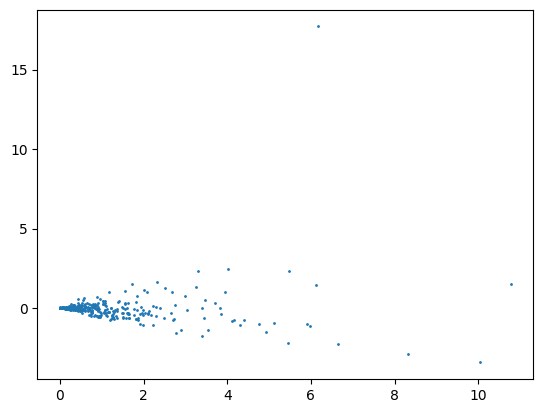

In [391]:

#représentation des points dans le premier plan
import matplotlib.pyplot as plt
plt.scatter(csvd[:,0],csvd[:,1],s=1)
plt.show()

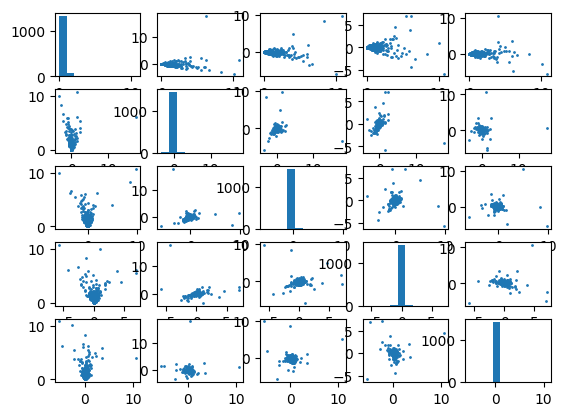

In [392]:

#graphique deux à deux sur les 5 premiers facteurs
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(5,5)
for i in range(5):
    for j in range(5):
        ax = plt.subplot(gs[i,j])
        if (i == j):
            ax.hist(csvd[:,i])            
        else:
            ax.scatter(csvd[:,i],csvd[:,j],s=1)
plt.show()

In [345]:
#les numéros des documents excentrés sur le 1er facteur
outliers = np.where(csvd[:,0] > 2.0)
print(outliers)

(array([   3,   14,   66,   77,   80,  110,  111,  188,  194,  210,  217,
        257,  274,  284,  294,  360,  394,  408,  413,  415,  463,  522,
        541,  561,  573,  615,  630,  642,  662,  672,  696,  698,  764,
        794,  798,  802,  838,  939,  959, 1034, 1035, 1044, 1076, 1094,
       1101, 1126, 1180, 1220, 1268, 1319, 1338, 1339, 1433], dtype=int32),)


In [346]:

#index des outliers
indexOutliers = np.array(outliers[0],dtype=int)
print(indexOutliers)

[   3   14   66   77   80  110  111  188  194  210  217  257  274  284
  294  360  394  408  413  415  463  522  541  561  573  615  630  642
  662  672  696  698  764  794  798  802  838  939  959 1034 1035 1044
 1076 1094 1101 1126 1180 1220 1268 1319 1338 1339 1433]


In [347]:
#affichage des commentaires concernés
print(disney.loc[indexOutliers,'Text'])

3        L'anticipation était probablement la plus gra...
14       Nous avons visité le 4 janvier, à une période...
66       J'ai eu une très mauvaise expérience avec Dis...
77       J'y étais pour la première fois au début de l...
80       Été à Euro Disney 3-4-5 janvier 2023. Désolé ...
110      Nous avons séjourné au parc avec 2 enfants en...
111      C'est un peu difficile pour moi de commenter ...
188      J'ai été extrêmement déçu du service que j'ai...
194      5-8 décembre 2022PRIX EN HAUT - SERVICE EN BA...
210      Beaucoup trop de monde. Souvent dû faire la q...
217      Nous avons visité les parcs pendant 2 jours e...
257      A voir au moins une fois dans sa vie.Vraiment...
274      Très bien organisé et conçu. Même s'il y a be...
284      Nous avons visité Disneyland Paris en janvier...
294      Mon fiancé et moi avons passé une belle journ...
360      Visiter Disneyland Paris est un rêve ! Et cel...
394      😍Notre première fois à Disneyland ParisCoût d...
408      Nous 

In [348]:

#affichage des notes
print(disney.loc[indexOutliers,'Review Rate'])

3       3
14      5
66      1
77      4
80      3
110     5
111     5
188     2
194     2
210     3
217     3
257     5
274     5
284     4
294     5
360     4
394     4
408     3
413     4
415     5
463     4
522     2
541     1
561     4
573     5
615     5
630     5
642     5
662     4
672     2
696     5
698     5
764     1
794     5
798     1
802     5
838     1
939     5
959     1
1034    2
1035    5
1044    1
1076    1
1094    5
1101    5
1126    5
1180    3
1220    1
1268    2
1319    1
1338    3
1339    5
1433    5
Name: Review_Rate, dtype: int64


In [349]:
#****************
#LDA en 10 topics
#****************

#importation de la classe
from sklearn.decomposition import LatentDirichletAllocation

#instanciation
lda = LatentDirichletAllocation(n_components=10,random_state=0)

#resultats
clda = lda.fit_transform(mdt_ter)

#propriétés de l'objet
print(dir(lda))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_approx_bound', '_check_feature_names', '_check_n_features', '_check_non_neg_array', '_check_params', '_e_step', '_em_step', '_get_param_names', '_get_tags', '_init_latent_vars', '_more_tags', '_n_features_out', '_perplexity_precomp_distr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_unnormalized_transform', '_validate_data', 'batch_size', 'bound_', 'components_', 'doc_topic_prior', 'doc_topic_prior_', 'evaluate_every', 'exp_dirichlet_component_', 'fit', 'fit_transform', 'get_feature_names_out', 'get_params', 'learning_decay', 'learning_method', 'learning_offset', 'max_doc_update_iter', 'max_iter', 'm

In [350]:
#components
print(lda.components_.shape)

(10, 2814)


In [351]:
#pour chaque facteur
for i in range(lda.components_.shape[0]):
    #index des valeurs triées
    index = np.argsort(lda.components_[i,:])
    #inversion pour que les max. soient en premier
    index = index[::-1]
    #affichage des 5 premiers
    print("TOPIC : "+ str(i))
    for j in range(5):
        print(parseur_ter.get_feature_names_out()[index[j]]+":"+str(lda.components_[i,index[j]]))
    print("")


TOPIC : 0
entrée:11.784920272085136
sécurité:9.100026951719231
expérience:8.100097861445226
spectacles:8.100052346291355
sommes:8.10003395274831

TOPIC : 1
expérience:13.250652360658902
attente:12.253208152723243
chaque:11.074378940354672
jours:10.914940610474678
pendant:9.608686202465748

TOPIC : 2
attente:19.195157887718665
prix:11.858853167882094
bien:11.231180606198429
parcs:10.829676620695626
nourriture:9.960682992515315

TOPIC : 3
attractions:8.024649632772574
fille:6.100052025362167
avait:5.100040939713398
nourriture:4.100067244775864
euros:4.1000530738546805

TOPIC : 4
enfants:12.10009422445193
endroit:11.338382127584318
expérience:11.100138556155688
voir:8.932655714679907
attente:6.948894989333429

TOPIC : 5
attente:9.413677192371878
trop:9.10015117923545
beaucoup:7.9878810594889895
monde:6.100092330428957
temps:5.761677866327461

TOPIC : 6
enfants:17.10010958557285
attractions:13.63663815481497
endroit:13.100023760096937
aux:11.985469972776633
super:10.690838581994997

TOPIC 

In [352]:
#informations sur les individus
print(clda.shape)

#calcul de la somme par ligne
print(np.sum(clda,axis=1))


(1467, 10)
[1. 1. 1. ... 1. 1. 1.]


In [353]:
#topic de rattachement pour chaque individu
topicIndiv = np.argmax(clda,axis=1)
print(topicIndiv)

#distribution de fréquences
idTopic, nbTopic = np.unique(topicIndiv,return_counts=True)
print(idTopic)
print(nbTopic)


[0 0 0 ... 0 5 0]
[0 1 2 3 4 5 6 7 8 9]
[1162   38   29   16   30   26   32   36   52   46]


In [354]:
#topic le plus populaire
print(np.argmax(nbTopic))

#croisement avec la note
disney_topics = pandas.crosstab(disney['Review Rate'],topicIndiv)
print(disney_topics)

0
col_0          0   1   2  3   4  5   6   7   8   9
Review_Rate                                       
1             74   4   5  3   2  2   2   2   8   4
2             31   2   1  2   2  4   1   0   8   3
3             58   6   3  1   1  4   3   3   8   4
4            183   5   9  3   6  7   6   2  12   9
5            816  21  11  7  19  9  20  29  16  26


In [355]:
#somme pour chaque ligne
somme_ligne = np.sum(disney_topics,axis=1)
print(somme_ligne)

#profil ligne en passant par quelque chose qui ressemble au apply() de R
def profil(x):
    return(x/np.sum(x))

profil_ligne = np.apply_along_axis(profil,axis=1,arr=disney_topics.values)
print(pandas.DataFrame(profil_ligne).round(2))


Review_Rate
1    106
2     54
3     91
4    242
5    974
dtype: int64
      0     1     2     3     4     5     6     7     8     9
0  0.70  0.04  0.05  0.03  0.02  0.02  0.02  0.02  0.08  0.04
1  0.57  0.04  0.02  0.04  0.04  0.07  0.02  0.00  0.15  0.06
2  0.64  0.07  0.03  0.01  0.01  0.04  0.03  0.03  0.09  0.04
3  0.76  0.02  0.04  0.01  0.02  0.03  0.02  0.01  0.05  0.04
4  0.84  0.02  0.01  0.01  0.02  0.01  0.02  0.03  0.02  0.03


In [356]:
#récupérer les modalités de la note
modalites = pandas.unique(disney['Review Rate'])
print(modalites)

#élaborer la première ligne de la matrice
mc = np.zeros(shape=(1,mdt_ter.shape[1]))
print(mc.shape)


[5 3 2 4 1]
(1, 2814)


In [1]:
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

senti_list = []
for i in disney["Review Text"]:
    vs = tb(i).sentiment[0]
    if (vs > 0):
        senti_list.append('Positive')
    elif (vs < 0):
        senti_list.append('Negative')
    else:
        senti_list.append('Neutral')

disney["sentiment"]=senti_list
disney["sentiment"]=disney["sentiment"].astype('category')



print(disney["sentiment"])

NameError: name 'disney' is not defined

In [ ]:
disney.head()

In [ ]:
disney.to_csv("C:/Users/kenan/Desktop/textmining/propre.csv",index=False)